## Topic 2 Energy consumption change over time in different countries

**Import Python packages and read csv file**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('owid-energy-data.csv')

Extract all the columns include "consumption" data

In [2]:
df_energy_cons_filter = df.filter(regex='consumption') 
print(list(df_energy_cons_filter.columns.values)) 

['biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption', 'primary_energy_consumption', 'renewables_consumption', 'solar_consumption', 'wind_consumption']


Create a new dataframe,named `df_energy_cons` composed of country information and consumption information which was copied by above output.

In [3]:
df_energy_cons = df[['iso_code',
                     'country',
                     'year',
                     'fossil_fuel_consumption',
                     'oil_consumption', 
                     'coal_consumption', 
                     'gas_consumption', 
                     'hydro_consumption', 
                     'solar_consumption', 
                     'wind_consumption', 
                     'nuclear_consumption',
                     'biofuel_consumption', 
                     'low_carbon_consumption',
                     'other_renewable_consumption', 
                     'primary_energy_consumption', 
                     'renewables_consumption']]
print(df_energy_cons.columns)

Index(['iso_code', 'country', 'year', 'fossil_fuel_consumption',
       'oil_consumption', 'coal_consumption', 'gas_consumption',
       'hydro_consumption', 'solar_consumption', 'wind_consumption',
       'nuclear_consumption', 'biofuel_consumption', 'low_carbon_consumption',
       'other_renewable_consumption', 'primary_energy_consumption',
       'renewables_consumption'],
      dtype='object')


### 1 Different types of energy consumption change over time (global)

In [4]:
#select data from the world
df_energy_cons_global = df_energy_cons.loc[df_energy_cons['iso_code'] == 'OWID_WRL']
df_energy_cons_global

,iso_code,country,year,fossil_fuel_consumption,oil_consumption,coal_consumption,gas_consumption,hydro_consumption,solar_consumption,wind_consumption,nuclear_consumption,biofuel_consumption,low_carbon_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption
16904,OWID_WRL,World,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
16905,OWID_WRL,World,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
16906,OWID_WRL,World,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
16907,OWID_WRL,World,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
16908,OWID_WRL,World,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17020,OWID_WRL,World,2016,130705.831,51920.156,43195.639,35590.036,10091.741,825.450,2423.694,6575.951,944.501,22239.107,1377.770,152944.938,15663.156
17021,OWID_WRL,World,2017,132512.670,52567.520,43359.508,36585.642,10164.682,1117.368,2852.430,6596.391,972.009,23160.114,1457.234,155672.784,16563.723
17022,OWID_WRL,World,2018,135807.237,53181.125,44109.462,38516.651,10367.535,1448.367,3156.845,6711.461,1040.053,24252.866,1528.605,160063.686,17541.405
17023,OWID_WRL,World,2019,136761.607,53619.925,43849.215,39292.468,10455.127,1792.996,3540.051,6923.412,1101.949,25427.562,1614.027,162194.290,18504.151


Above output shows the different types of energy consumption data from 1900 to 2020. However, we notice that some values are NaN for some reason, which could not be used for analysis. 

In [36]:
df_energy_cons_global.dropna().head(20)

,iso_code,country,year,fossil_fuel_consumption,oil_consumption,coal_consumption,gas_consumption,hydro_consumption,solar_consumption,wind_consumption,nuclear_consumption,biofuel_consumption,low_carbon_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption
16969,OWID_WRL,World,1965,40552.638,18108.643,16140.191,6303.804,2564.441,0.000,0.000,70.944,0.0,2685.343,49.959,43247.517,2614.400
16970,OWID_WRL,World,1966,42689.378,19496.471,16324.107,6868.800,2732.827,0.000,0.000,95.648,0.0,2883.492,55.017,45582.596,2787.844
16971,OWID_WRL,World,1967,44325.448,20890.580,16060.823,7374.045,2793.732,0.000,0.000,113.906,0.0,2963.156,55.518,47298.513,2849.250
16972,OWID_WRL,World,1968,47020.964,22675.466,16301.160,8044.338,2942.472,0.000,0.000,144.759,0.0,3148.675,61.445,50179.728,3003.916
16973,OWID_WRL,World,1969,50209.059,24576.884,16798.749,8833.425,3115.956,0.000,0.000,171.621,0.0,3352.182,64.606,53571.509,3180.561
16974,OWID_WRL,World,1970,53381.484,26708.063,17058.622,9614.799,3262.913,0.000,0.000,219.096,0.0,3553.379,71.370,56946.457,3334.283
16975,OWID_WRL,World,1971,55463.017,28204.844,16965.973,10292.201,3408.517,0.000,0.000,304.734,0.0,3790.693,77.442,59265.924,3485.959
16976,OWID_WRL,World,1972,58393.680,30377.966,17154.346,10861.368,3568.421,0.000,0.000,422.709,0.0,4074.122,82.992,62481.338,3651.413
16977,OWID_WRL,World,1973,61790.732,32746.140,17667.864,11376.729,3619.474,0.000,0.000,566.394,0.0,4274.992,89.125,66078.908,3708.599
16978,OWID_WRL,World,1974,61610.765,32272.443,17682.065,11656.257,3975.739,0.000,0.000,740.556,0.0,4810.626,94.330,66434.173,4070.069


The above code gives us an information that there are only 55 rows (years) containing full data without NaN.

In [37]:
#make column name easy to read
df_energy_cons_global_nona=df_energy_cons_global.dropna().rename(
    columns={
        'fossil_fuel_consumption': 'fossil_fuel', 
        'oil_consumption':'oil',
        'coal_consumption': 'coal',
        'biofuel_consumption':'biofuel',
        'gas_consumption':'gas',
        'hydro_consumption':'hydro',
        'low_carbon_consumption':'low_carbon',
        'nuclear_consumption':'nuclear',
        'other_renewable_consumption':'other_renewable',
        'primary_energy_consumption':'primary_energy',
        'renewables_consumption':'renewables',
        'solar_consumption':'solar',
        'wind_consumption':'wind'
    })

# sum up all the clean energy data into a new column called "nonrenewable_energy"
df_energy_cons_global_nona['nonrenewable_energy'] = df_energy_cons_global_nona.iloc[:,3:6].sum(axis=1)

# sum up all the energy consumption data into a new column called "total"
df_energy_cons_global_nona['total'] = df_energy_cons_global_nona.iloc[:,15] + df_energy_cons_global_nona.iloc[:,16]



In [40]:
# check whether total = low_carbon + nonrenewable_energy
df_energy_cons_global_nona[['total', 'low_carbon', 'nonrenewable_energy']].head(5)

,total,low_carbon,nonrenewable_energy
16969,77415.872,2685.343,74801.472
16970,81297.800,2883.492,78509.956
16971,84126.101,2963.156,81276.851
16972,89001.506,3148.675,85997.590
16973,94765.253,3352.182,91584.692


 Note: 
 
 * **Other renewables** = geothermal + wave + tidal+ bioenergy
 
 * **renewables** = hydro + wind + solar + **Other renewables**
 
 * **low_carbon** =  **renewables** + nuclear + biofuel 
 
 * 'nonrenewable_energy'includes energy from fossil_fuel, oil_consumption, coal and gas.
 
 * Biofuel production includes both bioethanol and biodiesel.

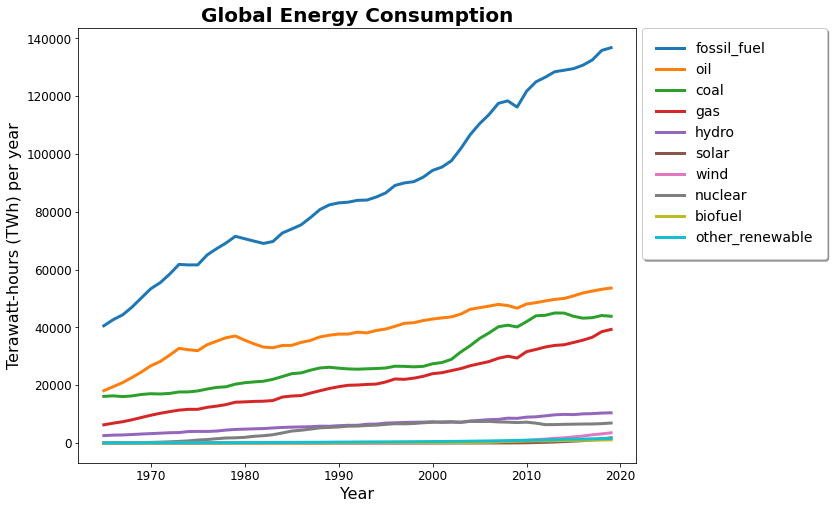

In [9]:
# line plot of individual energy consumption over years
df_energy_cons_global_nona.drop(['primary_energy', 
                                 'renewables', 
                                 'low_carbon',
                                 'total_renewables',
                                 'total',
                                 'nonrenewable_energy'], axis=1).plot(
    x='year',
    figsize=(10,8),
    linewidth = 3
)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel('Terawatt-hours (TWh) per year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Global Energy Consumption', fontsize=20, fontweight="bold")
plt.legend(fontsize=14,
           frameon=True,
           bbox_to_anchor=(1.01, 1), 
           loc='upper left', 
           borderaxespad=0.,
           fancybox=True, 
           framealpha=1, 
           shadow=True, 
           borderpad=1)

plt.show()

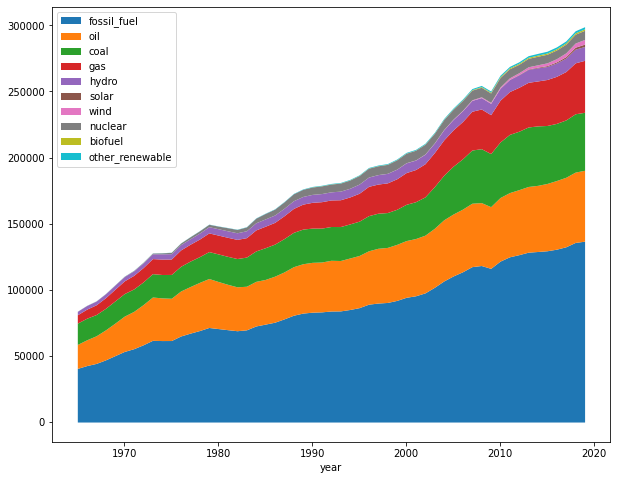

In [19]:
# area plot of individual energy consumption over years
df_energy_cons_global_nona.drop(['primary_energy', 
                                 'renewables', 
                                 'low_carbon', 
                                 'total_renewables',
                                 'total',
                                'nonrenewable_energy'], axis=1).plot.area(
    x='year',
    figsize=(10,8),
    linewidth=0
)
plt.show()

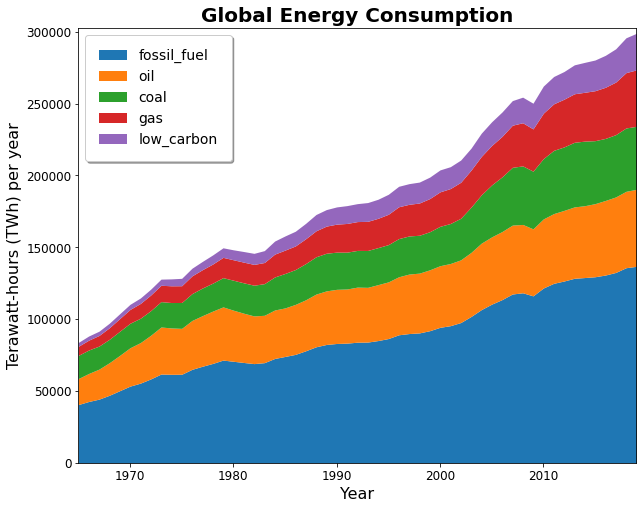

252734.89800000002


In [41]:
# area plot of individual 'non-clean' energy and total clean energy
df_energy_cons_global_nona.plot.area(
    x='year',
    y=['fossil_fuel',
    'oil',
    'coal',
    'gas',
    'low_carbon'],
    figsize=(10,8),
    linewidth=0
)

plt.tick_params(axis='both', which='major', labelsize=12)

year_min = df_energy_cons_global_nona['year'].min()
year_max = df_energy_cons_global_nona['year'].max()
y_min = 0
y_max = df_energy_cons_global_nona['total'].max() + 50000

plt.axis([year_min, year_max, y_min, y_max])
plt.ylabel('Terawatt-hours (TWh) per year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Global Energy Consumption', fontsize=20, fontweight="bold")
plt.legend(fontsize=14,
           frameon=True,
           #bbox_to_anchor=(1.01, 1), 
           #loc='upper left', 
           borderaxespad=0.5,
           fancybox=True, 
           framealpha=1, 
           shadow=True, 
           borderpad=1)

plt.show()

print(df_energy_cons_global_nona['total'].max())

2019


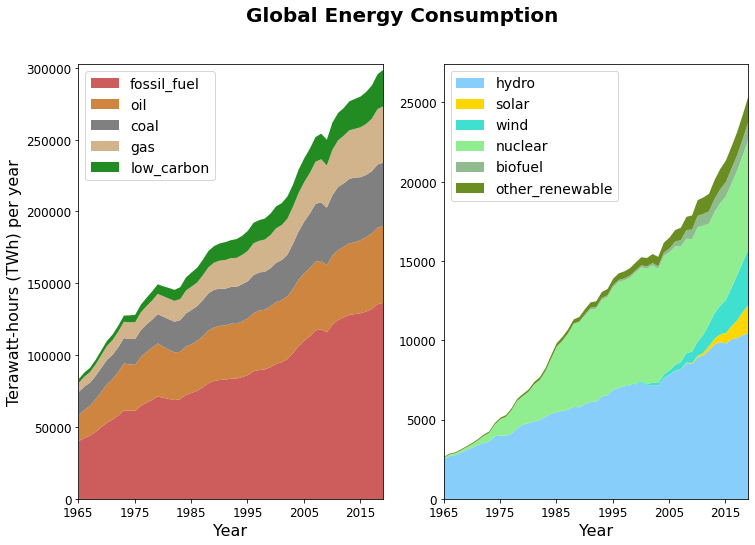

In [64]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,8))
fig.suptitle('Global Energy Consumption', fontsize=20, fontweight="bold")

#area plot of individual 'non-clean' energy and total clean energy
ax1_color=['indianred','peru','grey','tan','forestgreen']
df_energy_cons_global_nona.plot.area(
    ax=ax1,
    x='year',
    y=['fossil_fuel',
    'oil',
    'coal',
    'gas',
    'low_carbon'],
    linewidth=0,
    color=ax1_color
)


year_min = df_energy_cons_global_nona['year'].min()
year_max = df_energy_cons_global_nona['year'].max()
total_min = 0
total_max = df_energy_cons_global_nona['total'].max() + 50000

ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xticks(np.arange(year_min, year_max, 10))
ax1.axis([year_min, year_max, total_min, total_max])
ax1.set_ylabel('Terawatt-hours (TWh) per year', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.legend(prop={'size': 14})


#area plot of all clean energy consumption
ax2_color=['lightskyblue','gold','turquoise','lightgreen','darkseagreen','olivedrab']
df_energy_cons_global_nona.plot.area(
    ax=ax2,
    x='year',
    y=['hydro',
      'solar',
      'wind',
      'nuclear',
      'biofuel',
      'other_renewable'],
    linewidth=0,
    color=ax2_color
)

ren_min = 0
ren_max = df_energy_cons_global_nona['low_carbon'].max() + 2000

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xticks(np.arange(year_min, year_max, 10))
ax2.axis([year_min, year_max, ren_min, ren_max])
ax2.set_xlabel('Year', fontsize=16)
ax2.legend(prop={'size': 14})

#plt.show()
print(year_max)

### First conclusion

* The total energy consumption has been arising since 1965 due to the economy growth. 

* Fossil fuel is the major energy source over time, following oil, coal, and gas. 

* Low carbon energy, i.e., clean energy, which would generate much less CO2 and have little impact on environmental only makes up a small proportion of total energy consumption.

* Hydropower is the dominant one among all clean energy. Nuclear energy consumption is also one of the major clean energy sources from 1985, but the percentage has shrinked since 2010; meanwhile, the proportions of wind and solor energy consumption has become significant in the past decade.

In [34]:
print(df_energy_cons_global_nona['low_carbon'])

16969     2685.343
16970     2883.492
16971     2963.156
16972     3148.675
16973     3352.182
16974     3553.379
16975     3790.693
16976     4074.122
16977     4274.992
16978     4810.626
16979     5147.842
16980     5317.413
16981     5752.177
16982     6342.096
16983     6645.073
16984     6924.929
16985     7396.727
16986     7706.883
16987     8276.773
16988     9088.908
16989     9851.576
16990    10241.787
16991    10723.032
16992    11346.100
16993    11499.570
16994    11992.629
16995    12420.196
16996    12488.026
16997    13076.747
16998    13261.399
16999    13913.380
17000    14253.758
17001    14377.597
17002    14582.748
17003    14933.661
17004    15268.987
17005    15219.685
17006    15469.445
17007    15291.334
17008    16186.198
17009    16506.912
17010    16982.305
17011    17125.569
17012    17814.072
17013    17902.397
17014    18871.237
17015    19036.297
17016    19266.268
17017    20137.543
17018    20829.361
17019    21365.767
17020    22239.107
17021    231

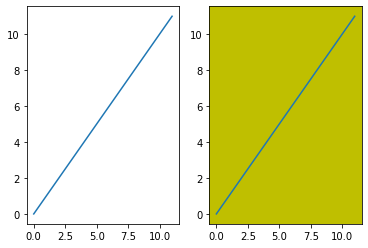

In [13]:
plt.subplot(121)
plt.plot(range(12))
plt.subplot(122, facecolor='y') # creates 2nd subplot with yellow background
plt.plot(range(12))

In [14]:
min = df_energy_cons_global_nona['year'].min()
print(min)

1965


In [15]:
import sqlite3
con_cons = sqlite3.connect('energy_cons_global.db')
df_energy_cons.to_sql('energy_cons_global', con_cons)

In [16]:
%load_ext sql
%sql sqlite:////Users/jingai/workspace/energy-data/energy_cons_global.db

In [17]:
%%sql
SELECT COUNT(iso_code)
FROM 'energy_cons'
WHERE 

 * sqlite:////Users/jingai/workspace/energy-data/energy_cons_global.db
(sqlite3.OperationalError) incomplete input
[SQL: SELECT COUNT(iso_code) FROM 'energy_cons'
WHERE]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


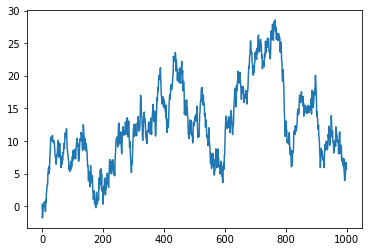

In [18]:
# libraries
import matplotlib.pyplot as plt
import numpy as np

# create data
values=np.cumsum(np.random.randn(1000,1))

# use the plot function
plt.plot(values)